In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('display.max_columns', None, 'display.max_rows', None)

data = pd.read_csv('pems_sample.csv')
data.head()

In [ ]:
pip install pyts

In [ ]:
data.columns

In [ ]:
data.shape

In [ ]:
data['Hour'] = pd.to_datetime(data['Hour'])
data = data.drop(columns = ['# Lane Points', '% Observed'])

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(data['Hour'], data['1108509-ML'], color = 'red')
plt.plot(data['Hour'], data['716017-ML'], color = 'gold')
plt.plot(data['Hour'], data['1205517-ML'], color = 'steelblue')
plt.grid()
plt.show()

In [ ]:
pip install pyts

In [ ]:
from pyts.image import GramianAngularField
import matplotlib.pyplot as plt

#Xtrain, Xtest = get_some_data() # both N x T time series samples
Xtrain = pd.concat([data['1108509-ML'], data['716017-ML'], data['1205517-ML'], data['1125314-ML']], axis = 1)


gaf = GramianAngularField(image_size = 1)
im_train = gaf.fit_transform(Xtrain)
#im_test = gaf.transform(Xtest)

# plot one image
plt.imshow(im_train[0])
plt.show()

In [ ]:
im_train

## Exploration

In [ ]:
pip install torch

In [ ]:
pip install torchvision

In [1]:
## Importing libraries
import numpy as np
import torch

## Step 1: Prepping data set
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## Step 2: Building the model
import torch.nn as nn
import torch.nn.functional as F

## Step 3: Training the model
import torch.optim as optim

### Step 1: Preparing the data set
- Splitting the images into train and test sets
- Preprocessing the images (normalizing speeds up learning)

In [2]:
## Downloading, splitting, and preprocessing the images
transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 1, shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 1, shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


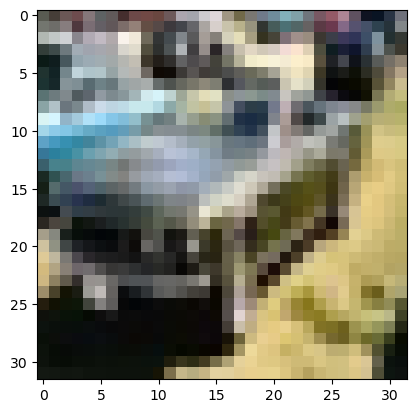

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [4]:
## Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.ion()
    plt.show()

## Getting some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

## Showing images
imshow(torchvision.utils.make_grid(images))

## Printing image labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
for i, data in enumerate(trainloader, 0):
    
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    
    imshow(torchvision.utils.make_grid(inputs))

In [ ]:
torchvision.utils.make_grid(trainloader)

In [ ]:
from PIL import Image

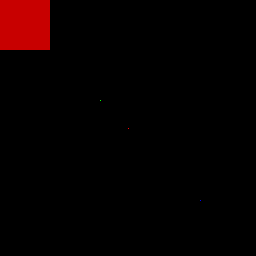

In [17]:
import numpy

data = numpy.zeros((256, 256, 3), dtype=numpy.uint8)

data[128, 128] = [255, 0, 0]
data[100, 100] = [0, 255, 0]
data[200, 200] = [0, 0, 255]

for i in range(0, 50):
    data[i, 0:50] = [200, 0, 0]
image = Image.fromarray(data)

image.show()

### Step 2: Building the network

In [ ]:
## Defining the network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)   # first convolutional layer
        self.pool = nn.MaxPool2d(2, 2)    # max pooling layer
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [ ]:
net

### Step 3: Training the network

In [ ]:
## Defining loss function and optimizer (cross-entropy loss and SGD with momentum)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

## Training the model
for epoch in range(5):  # loop over the dataset multiple times (5 epochs)

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

# save trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Testing the network

In [ ]:
## Displaying images from test set
dataiter = iter(testloader)
images, labels = next(dataiter)

## Printing images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Loading trained network (only needed if you exited ipython after training)
net = Net()
net.load_state_dict(torch.load(PATH))

## Getting object categories predicted by the network
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

## Computing accuracy on the full test data set (10,000 images)
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

## Investigating performance per object categoryclass_correct = list(0. for i in range(10))
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))